In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import openpyxl

In [2]:
ms = [5.0061,5.9971,6.917,8.0010,8.0012,6.9918,6.0011]
Qs = [1577.172649,2047.907057,2322.42361,2614.943672,2525.579934,2105.588662,1761.789177]

In [13]:
# 调用线性回归模型并在 ax 上绘图(数据处理)
def regression(xs,ys,ax,fig,c):
    lr = LinearRegression()
    xs = np.array(xs).reshape(-1, 1); ys = np.array(ys).reshape(-1,1)
    
    lr.fit(xs,ys) # 训练模型
        
    length = np.max(xs) - np.min(xs)
    min_1 = np.min(xs) - (length)*0.03; max_1 = np.max(xs) + (length)*0.03
    xs_hat = np.row_stack((xs,[min_1]))
    xs_hat = np.row_stack((xs_hat,[max_1])); 
    ys_hat = lr.predict(xs_hat) # 计算 ys_hat
    
    #target_point = ax.scatter(xs, ys, c=c, s=30, alpha=0.6, edgecolors='none')
    #plt.legend([target_point],['selected points'], fontsize=16)
    ax.plot(xs_hat, ys_hat, c=c, alpha =0.6, linewidth=1)
    
    k = (np.max(ys_hat) - np.min(ys_hat))/(np.max(xs_hat) - np.min(xs_hat))
    b = lr.predict([[0]])[0][0]
    
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect_text = [left + width*0.55, bottom + height*0.6]
    text = 'Work Function is $y = ' + str(format(k, '.4f')) + 'x + ' + str(format(b, '.4f')) + '$'
    ax.annotate(text, xy=(np.average(xs), np.average(ys)), xytext=(np.average(xs)-0.35,
            np.average(ys)-0.18*(np.max(ys)-np.min(ys))),color=c,fontsize=20, arrowprops=dict(facecolor=c, shrink=0.05))
    
    
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect_text = [left, bottom+height*0.88]
    R2 = lr.score(xs,ys) # 计算 R2
    text2 = 'Determination Factor is ' + str(format(R2, '.4f'))
    fig.text(rect_text[0], rect_text[1], text = text2, s=20, fontsize=20)
    
    return k,b

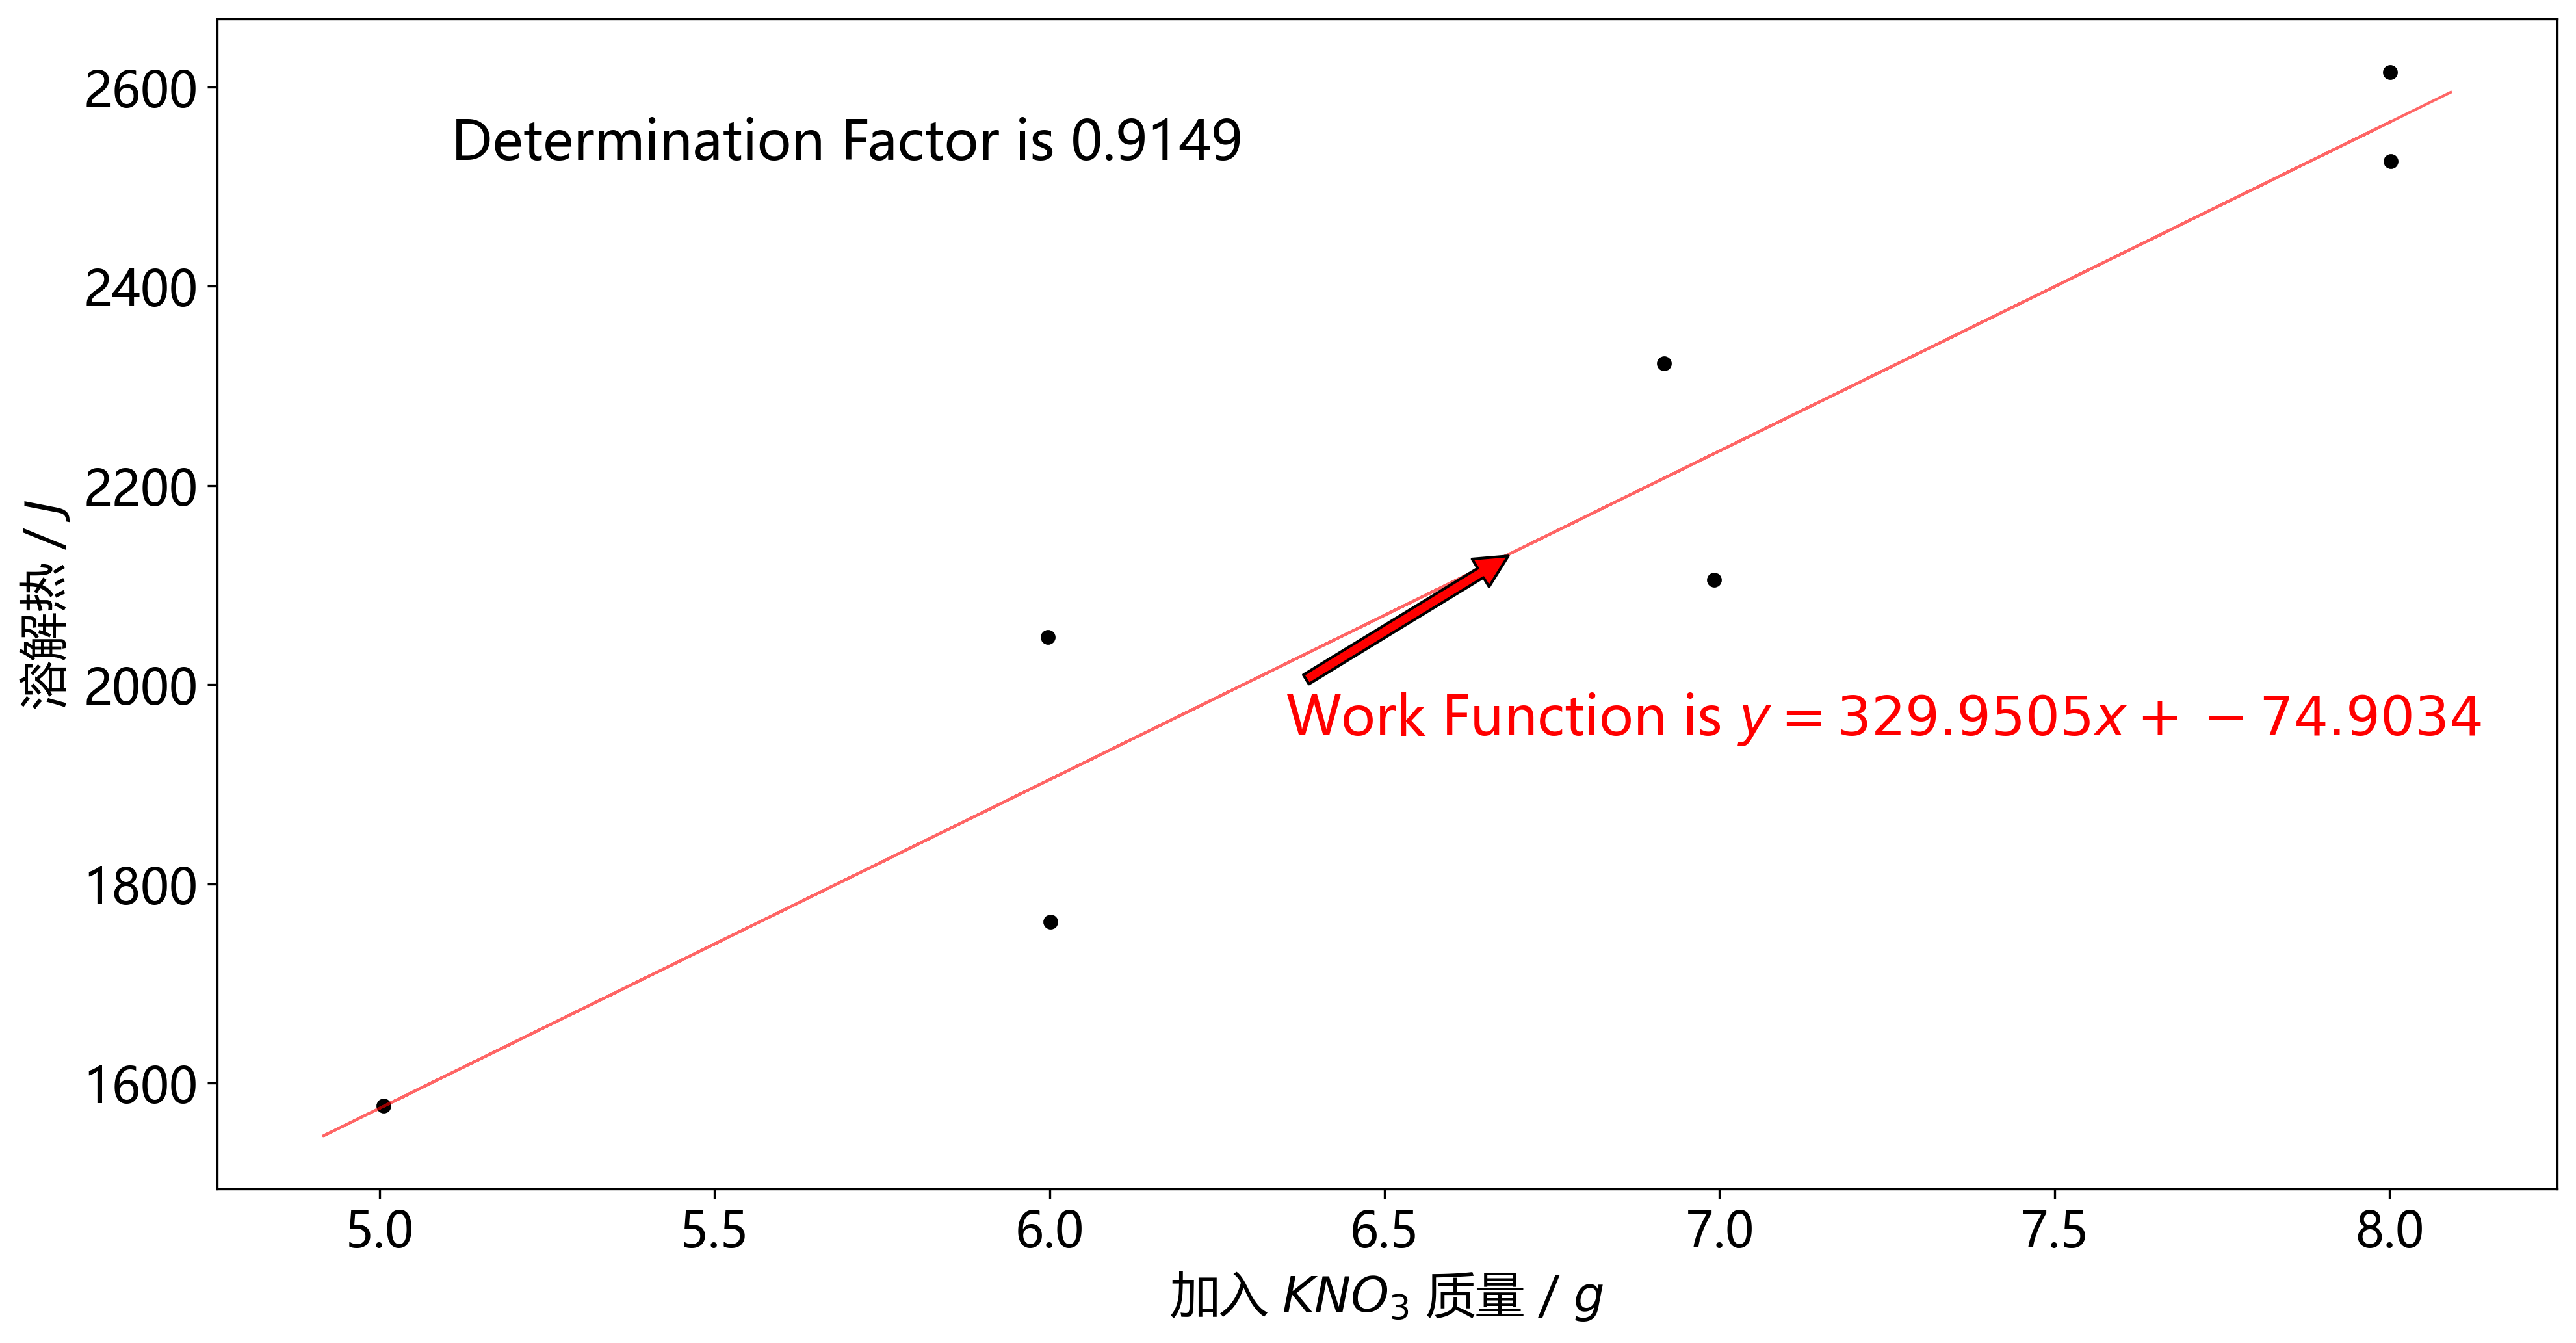

In [14]:
## g(KNO3) - Qsol
left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect = [left*0, bottom, width, height]; rect_text = [left + width*0.45, bottom+height*0.7]
fig1 = plt.figure(figsize=(12,6)); ax1 = fig1.add_axes(rect)
plt.rcParams['figure.dpi'] = 300 # 每英寸点数
plt.rcParams['font.size'] = 18

ax1.scatter(ms,Qs,c='k',s=20)
ax1.set_xlabel('加入 $KNO_3$ 质量 / $g$'); ax1.set_ylabel('溶解热 / $J$')
k,b = regression(xs=ms,ys=Qs,ax=ax1,fig=fig1,c='r') # y_hat = kx+b
plt.savefig('溶解热 - 加入KNO_3质量',bbox_inches='tight')

[-1.96401671e-01  4.20401375e-02 -4.85953552e+02]
popt: [-1.96401671e-01  4.20401375e-02 -4.85953552e+02]
系数a: -0.19640167051933263
系数b: 0.042040137450105416
系数c: -485.95355159953976
系数pcov: [[-8.84958556e+10 -1.89427002e+10  2.18963898e+14]
 [-1.89427002e+10 -4.05471972e+09  4.68696240e+13]
 [ 2.18963898e+14  4.68696240e+13 -5.41778917e+17]]
系数yvals: [412.05987012 482.05616268 520.0763058  528.91733087 509.04771734
 460.0291367 ]


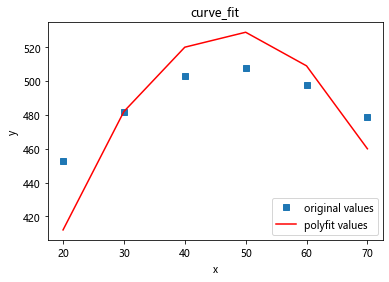

In [1]:
##使用curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 
#自定义函数 e指数形式
def func(x, a, b,c):
    return a*np.sqrt(x)*(b*np.square(x)+c)
 
#定义x、y散点坐标
x = [20,30,40,50,60,70]
x = np.array(x)
num = [453,482,503,508,498,479]
y = np.array(num)
 
#非线性最小二乘法拟合
popt, pcov = curve_fit(func, x, y)
#获取popt里面是拟合系数
print(popt)
a = popt[0] 
b = popt[1]
c = popt[2]
yvals = func(x,a,b,c) #拟合y值
print('popt:', popt)
print('系数a:', a)
print('系数b:', b)
print('系数c:', c)
print('系数pcov:', pcov)
print('系数yvals:', yvals)
#绘图
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()

In [2]:
x

array([20, 30, 40, 50, 60, 70])

In [3]:
y

array([453, 482, 503, 508, 498, 479])